In [291]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
#Loading the data
df = pd.read_csv("Indian_Kids_Screen_Time.csv")
df.isnull().sum()
df['Health_Impacts'] = df['Health_Impacts'].fillna(value="Healthy")

df.describe()


,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


# Analysis Of Data

Health_Impacts
Healthy                                          3218
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64


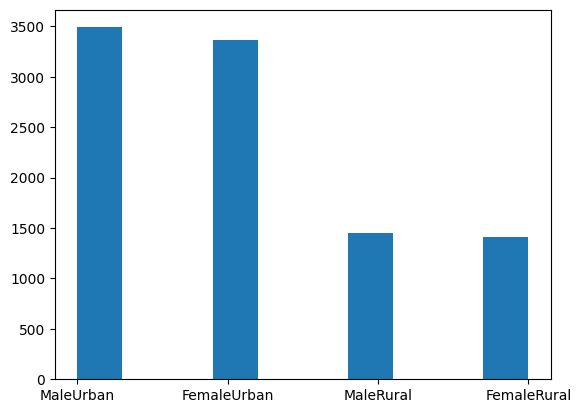

Gender_Locality  Primary_Device
FemaleRural      Smartphone         639
                 TV                 363
                 Laptop             216
                 Tablet             192
FemaleUrban      Smartphone        1582
                 TV                 855
                 Laptop             525
                 Tablet             398
MaleRural        Smartphone         681
                 TV                 382
                 Tablet             200
                 Laptop             188
MaleUrban        Smartphone        1666
                 TV                 887
                 Laptop             504
                 Tablet             434
Name: count, dtype: int64

In [293]:

print(df['Health_Impacts'].value_counts())

#plot the screen time for the boys vs girls


df["Health_Impacts"]
df["Gender_Locality"] = df["Gender"]+df["Urban_or_Rural"]

plt.hist(df["Gender_Locality"])
plt.show()
df.groupby("Gender_Locality")["Primary_Device"].value_counts()

In [294]:
effects = df['Health_Impacts'].to_numpy()
print(effects)
for idx,effect in enumerate(effects):
    if(effect == "Healthy"):
        effects[idx] = 0
    else:
        effects[idx] = 2
effects = effects.astype("int")
effects


['Poor Sleep, Eye Strain' 'Poor Sleep' 'Poor Sleep' ...
 'Poor Sleep, Eye Strain, Anxiety' 'Poor Sleep' 'Anxiety']


array([2, 2, 2, ..., 2, 2, 2], shape=(9712,))

In [295]:
df["Health_Impacts"] = effects


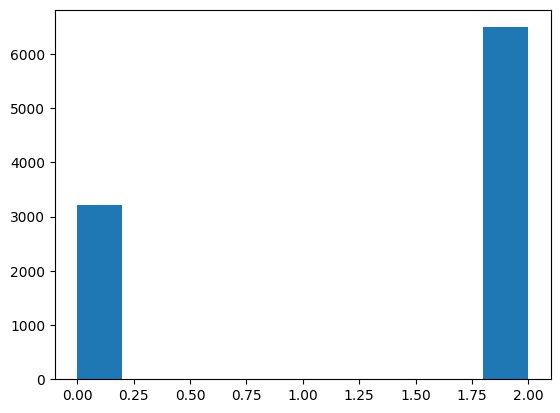

In [296]:
plt.hist(df["Health_Impacts"])
plt.show()

In [297]:
df.groupby("Primary_Device")["Avg_Daily_Screen_Time_hr"].mean()
df['Exceeded_Recommended_Limit'] = df['Exceeded_Recommended_Limit'].astype("int")
df_numeric = df.select_dtypes(include=['int','float'])
df_numeric.corr()

,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts
Age,1.000000,0.118328,0.159173,-0.488617,0.171629
Avg_Daily_Screen_Time_hr,0.118328,1.000000,0.664950,-0.087552,0.466899
Exceeded_Recommended_Limit,0.159173,0.664950,1.000000,-0.126643,0.585681
Educational_to_Recreational_Ratio,-0.488617,-0.087552,-0.126643,1.000000,-0.139873
Health_Impacts,0.171629,0.466899,0.585681,-0.139873,1.000000


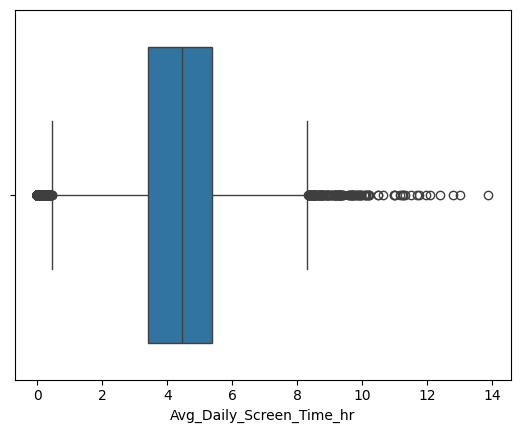

In [298]:
sns.boxplot(data=df,x="Avg_Daily_Screen_Time_hr")
plt.show()

In [299]:
df_cat = df[["Gender","Primary_Device","Urban_or_Rural"]]
dummies = pd.get_dummies(df_cat)
dummies = dummies.astype("int")
df = pd.concat([df,dummies],axis=1)


In [300]:
df = df.drop(columns=["Gender","Primary_Device","Urban_or_Rural","Gender_Locality"])

In [301]:
df

,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Gender_Female,Gender_Male,Primary_Device_Laptop,Primary_Device_Smartphone,Primary_Device_TV,Primary_Device_Tablet,Urban_or_Rural_Rural,Urban_or_Rural_Urban
0,14,3.99,1,0.42,2,0,1,0,1,0,0,0,1
1,11,4.61,1,0.30,2,1,0,1,0,0,0,0,1
2,18,3.73,1,0.32,2,1,0,0,0,1,0,0,1
3,15,1.21,0,0.39,0,1,0,1,0,0,0,0,1
4,12,5.89,1,0.49,2,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9707,17,3.26,1,0.44,2,0,1,0,1,0,0,0,1
9708,17,4.43,1,0.40,2,1,0,0,1,0,0,1,0
9709,16,5.62,1,0.39,2,0,1,0,1,0,0,1,0
9710,17,5.60,1,0.43,2,0,1,0,0,1,0,0,1


In [302]:
df.corr()

,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Gender_Female,Gender_Male,Primary_Device_Laptop,Primary_Device_Smartphone,Primary_Device_TV,Primary_Device_Tablet,Urban_or_Rural_Rural,Urban_or_Rural_Urban
Age,1.000000,0.118328,0.159173,-0.488617,0.171629,-0.001940,0.001940,0.187549,0.069151,-0.139897,-0.120432,-0.006892,0.006892
Avg_Daily_Screen_Time_hr,0.118328,1.000000,0.664950,-0.087552,0.466899,-0.014762,0.014762,0.025728,0.019793,-0.022225,-0.028032,0.007848,-0.007848
Exceeded_Recommended_Limit,0.159173,0.664950,1.000000,-0.126643,0.585681,-0.030390,0.030390,0.041353,0.026144,-0.027232,-0.047694,-0.002142,0.002142
Educational_to_Recreational_Ratio,-0.488617,-0.087552,-0.126643,1.000000,-0.139873,-0.007141,0.007141,-0.160376,-0.066266,0.132034,0.097396,0.005633,-0.005633
Health_Impacts,0.171629,0.466899,0.585681,-0.139873,1.000000,-0.016407,0.016407,0.058482,0.019097,-0.040071,-0.038517,-0.006732,0.006732
Gender_Female,-0.001940,-0.014762,-0.030390,-0.007141,-0.016407,1.000000,-1.000000,0.021598,-0.009305,-0.001641,-0.006927,0.002184,-0.002184
Gender_Male,0.001940,0.014762,0.030390,0.007141,0.016407,-1.000000,1.000000,-0.021598,0.009305,0.001641,0.006927,-0.002184,0.002184
Primary_Device_Laptop,0.187549,0.025728,0.041353,-0.160376,0.058482,0.021598,-0.021598,1.000000,-0.392055,-0.244092,-0.157987,-0.011552,0.011552
Primary_Device_Smartphone,0.069151,0.019793,0.026144,-0.066266,0.019097,-0.009305,0.009305,-0.392055,1.000000,-0.552881,-0.357850,-0.011612,0.011612
Primary_Device_TV,-0.139897,-0.022225,-0.027232,0.132034,-0.040071,-0.001641,0.001641,-0.244092,-0.552881,1.000000,-0.222796,0.006401,-0.006401


In [303]:
y = df['Health_Impacts']
x = df.drop(columns=['Health_Impacts'],axis=1)


In [304]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

log_reg = LogisticRegression(penalty="l2",max_iter=1000,solver='lbfgs')
scores = cross_val_score(log_reg,x_train,y_train,cv=5,scoring='f1_macro')
print(scores)
log_reg.fit(x_train,y_train)
x_train

[0.76076332 0.75416788 0.74185928 0.74795626 0.74743861]


array([[17.  ,  5.72,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [11.  ,  6.07,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [17.  ,  3.11,  1.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [18.  ,  3.62,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [14.  ,  3.19,  1.  , ...,  1.  ,  1.  ,  0.  ],
       [ 9.  ,  7.2 ,  1.  , ...,  0.  ,  0.  ,  1.  ]], shape=(7769, 12))

In [305]:
from sklearn .metrics import precision_score,recall_score

y_pred = log_reg.predict(x_train)
precision_score(y_train,y_pred,average=None)

array([1.        , 0.78500302])